          mint  entry_price  exit_price        pnl decision
0   MockMint_3     0.000909    0.000979   7.707599     HOLD
1   MockMint_7     0.000161    0.000180  11.181762     HOLD
2   MockMint_8     0.000560    0.000537  -4.014759     HOLD
3  MockMint_10     0.000163    0.000138 -15.574603     HOLD
4  MockMint_11     0.000342    0.000318  -7.050295     HOLD

🔍 Feature correlations with PnL:
pnl            1.000000
exit_price     0.264916
entry_price    0.116400
Name: pnl, dtype: float64


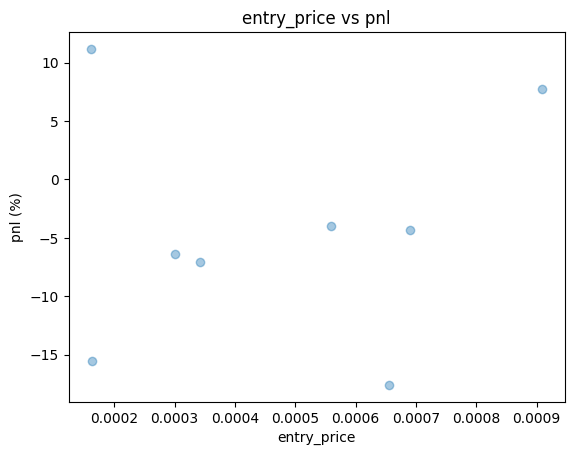

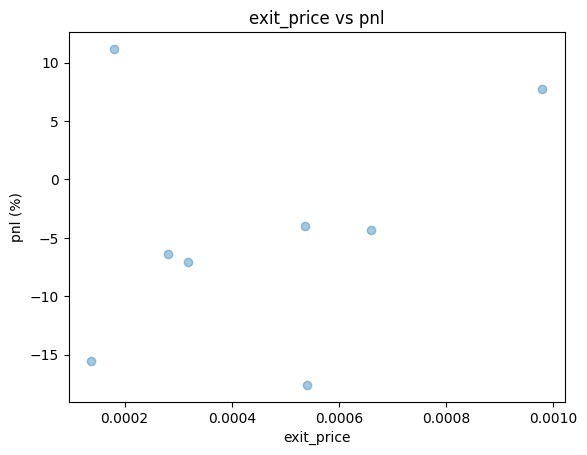

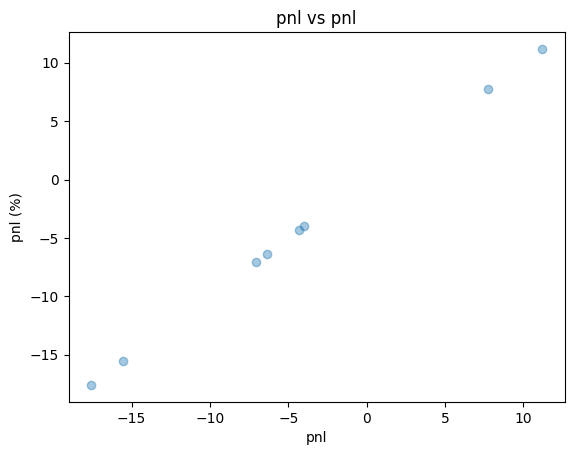

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Load the backtest results
df = pd.read_csv("C:/Users/Richard Wang/mev-pumpbot/data/backtest_results.csv")

# Rename for convenience (so later analytics code works)
df = df.rename(columns={"pnl_pct": "pnl"})

print(df.head())

# --- Correlations ---
print("\n🔍 Feature correlations with PnL:")
print(df.corr(numeric_only=True)["pnl"].sort_values(ascending=False))

# --- Scatter plots ---
numeric_cols = [c for c in df.columns if c not in ["mint", "decision"]]
for col in numeric_cols:
    plt.scatter(df[col], df["pnl"], alpha=0.4)
    plt.title(f"{col} vs pnl")
    plt.xlabel(col)
    plt.ylabel("pnl (%)")
    plt.show()




In [9]:
import statsmodels.api as sm

X = df[["entry_price", "exit_price"]]
y = df["pnl"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    pnl   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     5.590
Date:                Fri, 07 Nov 2025   Prob (F-statistic):             0.0531
Time:                        22:29:28   Log-Likelihood:                -24.536
No. Observations:                   8   AIC:                             55.07
Df Residuals:                       5   BIC:                             55.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1618      5.076     -0.426      